Visualization helps us:

* finding new insights in our data
* engineer features

In [1]:
import numpy as np
import pandas as pd
import pprint
pp = pprint.PrettyPrinter(indent=4)

pd.set_option("display.precision", 2)

# some imports to set up plotting
import matplotlib.pyplot as plt

# !pip install seaborn
import seaborn as sns

# import some nice vis settings
sns.set()
# Graphics in the Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
DATA_URL = "./data/"
df = pd.read_csv(DATA_URL + "telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.

#### Histograms and density plots

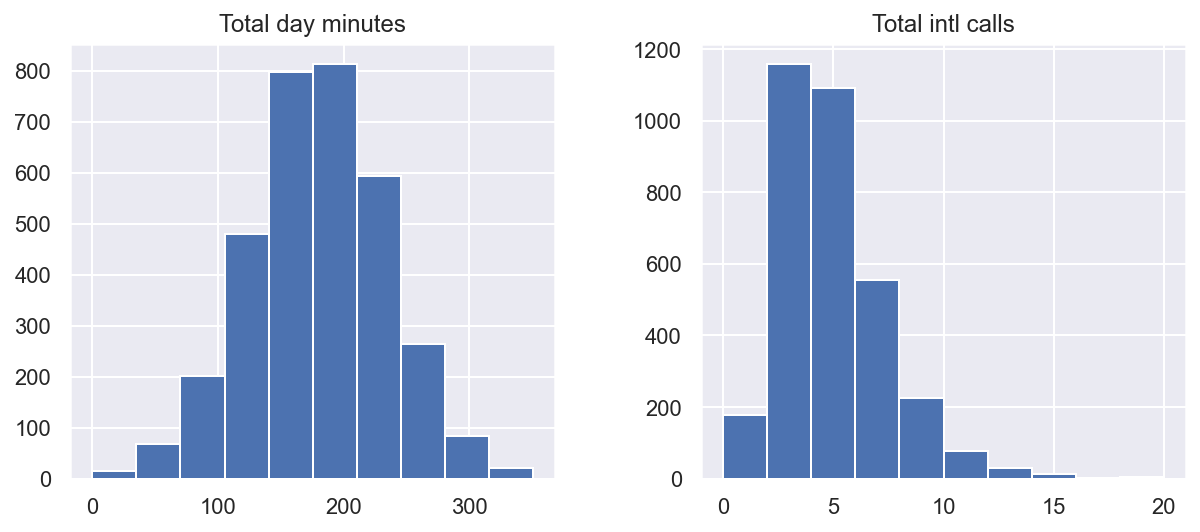

In [3]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

* underlying distribution type: Gaussian, exponential,
* any skewness in its shape when the distribution is nearly regular but has some anomalies

The variable Total day minutes is normally distributed, while Total intl calls is prominently skewed right (its tail is longer on the right)

A histogram groups values into bins of equal value range.

The density plots or, more formally, Kernel Density Plots:
* a smoothed version of the histogram
* they do not depend on the size of the bins

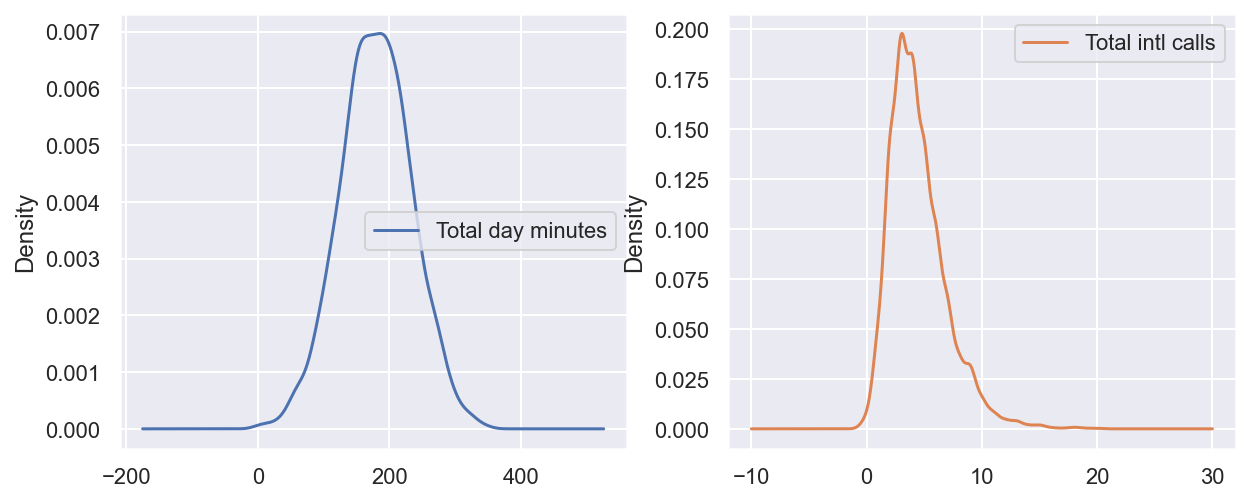

In [4]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

Plot a distribution of observations with seaborn’s distplot() — By default, the plot displays the histogram with the kernel density estimate (KDE) on top.

The height of the histogram bars gets normed and show the density rather than the number of examples in each bin.

/Users/rahulmehrotra/opt/anaconda3/envs/pocenv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


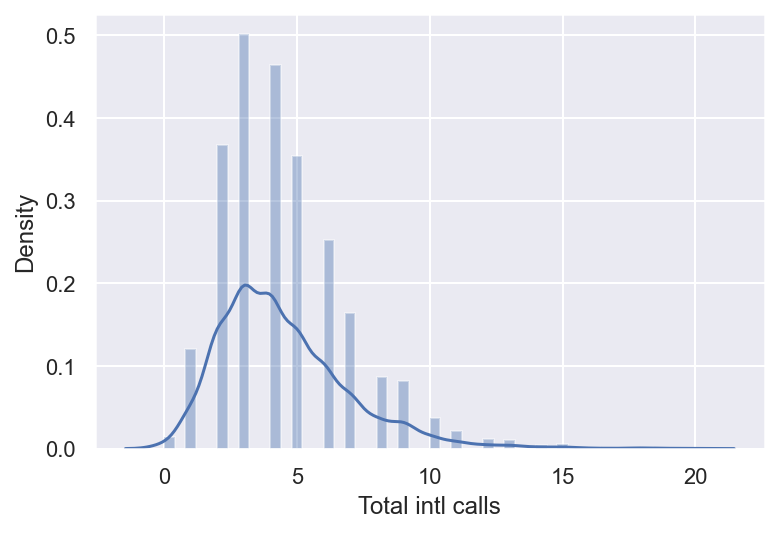

In [5]:
sns.distplot(df["Total intl calls"]);

#### Box plot

* box 
* the so-called whiskers, 
* and a number of individual points (outliers)

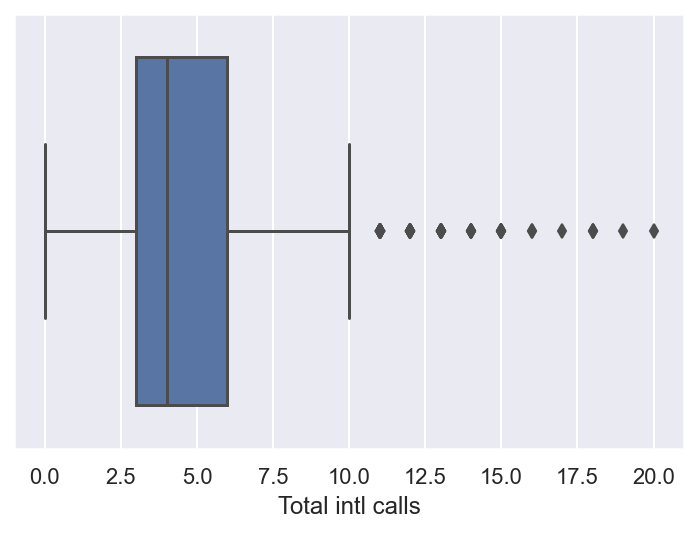

In [6]:
sns.boxplot(x="Total intl calls", data=df);

The box illustrates the interquartile spread of the distribution; (Q1) and (Q3) percentiles. The vertical line inside the box marks the median (50%) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval.

Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points along the central axis.

A large number of international calls is quite rare in our data.

#### Violin plot

* kernel density estimate on both sides.

* Box plot illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole

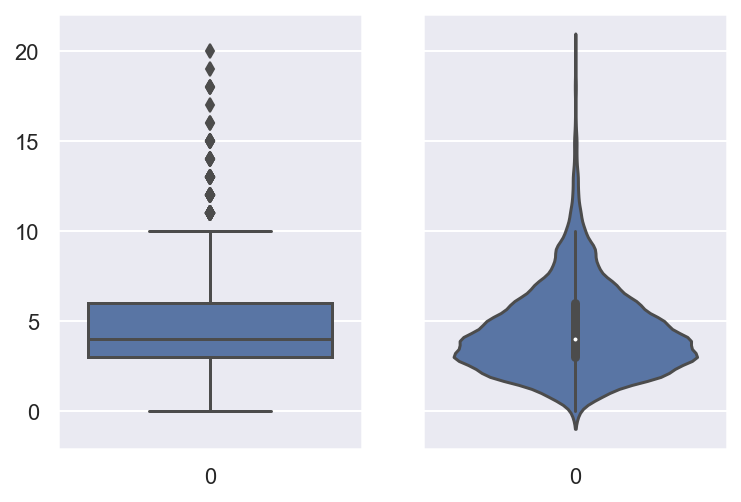

In [7]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

In [8]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.00,3333.00
mean,179.78,4.48
std,54.47,2.46
min,0.00,0.00
25%,143.70,3.00
50%,179.40,4.00
75%,216.40,6.00
max,350.80,20.00


### Categorical and binary features

* Take on a fixed number of values. 
* Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this example. 
* Binary variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called ordinal.

Frequency table:

By default, the entries in the output are sorted from the most to the least frequently-occurring values.

In [9]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In this case, the data is not balanced; that is, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service. This fact may imply some restrictions on measuring the classification performance, and, in the future, we may want to additionally penalize our model errors in predicting the minority “Churn” class.

#### Bar Plot

The bar plot is a graphical representation of the frequency table.

 Use the seaborn’s function countplot(). There is another function in seaborn that is somewhat confusingly called barplot() and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

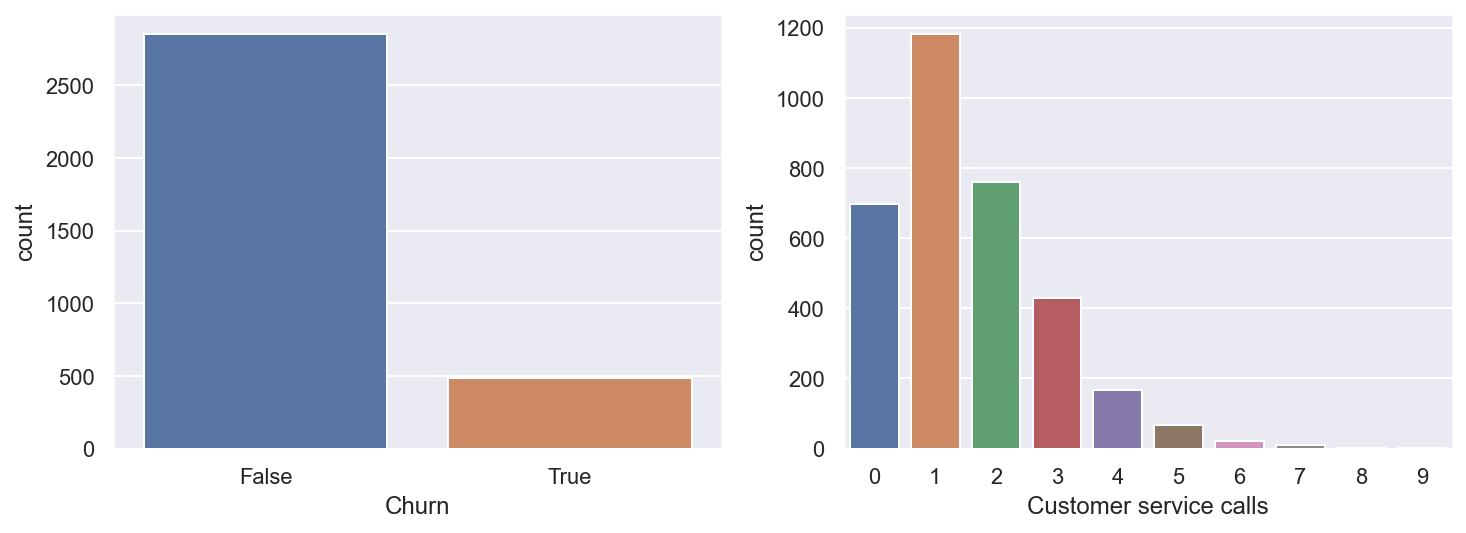

In [10]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:

* Histograms are best suited for looking at the distribution of numerical variables while bar plots are used for categorical features.
* The values on the X-axis in the histogram are numerical; a bar plot can have any type of values on the X-axis: numbers, strings, booleans.
* The histogram’s X-axis is a Cartesian coordinate axis along which values cannot be changed; the ordering of the bars is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider ordinal variables (like Customer service calls in our data), the bars are usually ordered by variable value.

The left chart above vividly illustrates the imbalance in our target variable. 

The bar plot for Customer service calls on the right gives a hint that the majority of customers resolve their problems in maximum 2–3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now.

#### Multivariate visualization

Multivariate plots allow us to see relationships between two and more different variables, the specific type of visualization will depend on the types of the variables being analyzed.

#### Quantitative vs. Quantitative

Correlation matrix:

correlations among the numerical variables;there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method corr() on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to heatmap() from seaborn, which renders a color-coded matrix for the provided values:

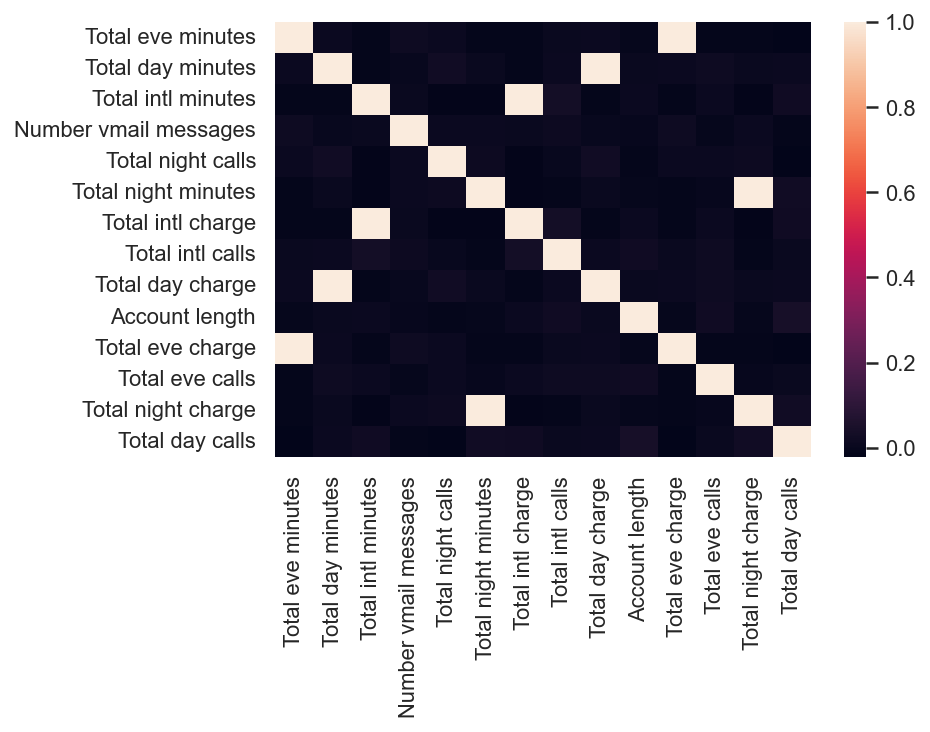

In [11]:
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

From the colored correlation matrix generated above, we can see that there are 4 variables such as Total day charge that have been calculated directly from the number of minutes spent on phone calls (Total day minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information. Let’s get rid of them:

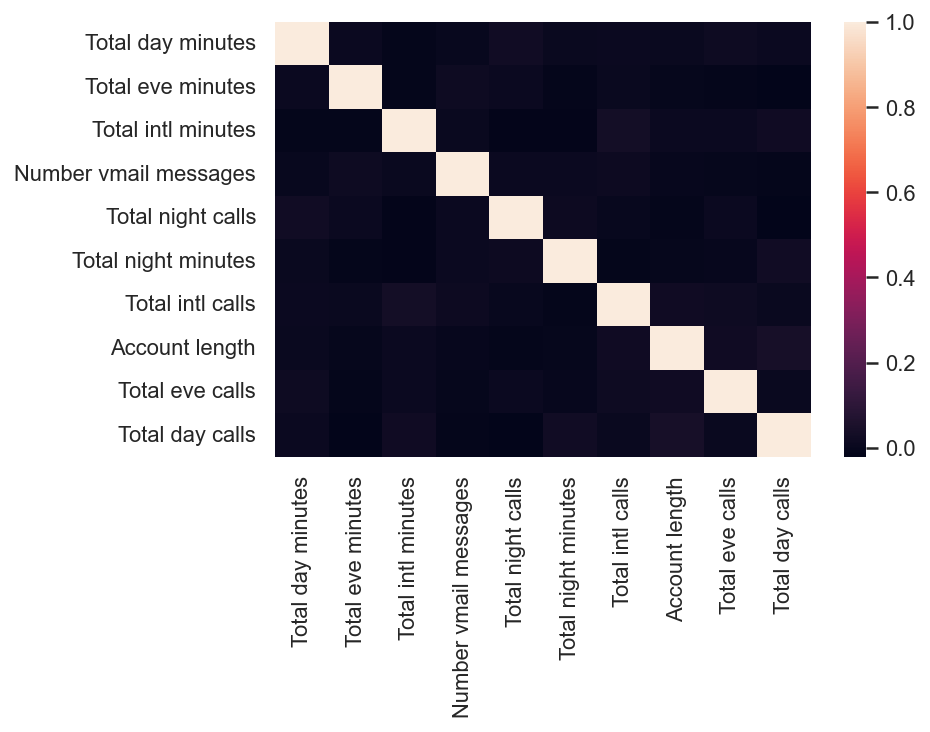

In [12]:
numerical = list(
    set(numerical)
    - set(
        [
            "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
        ]
    )
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

#### Scatter plot

The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space. Scatter plots in 3D are also possible.

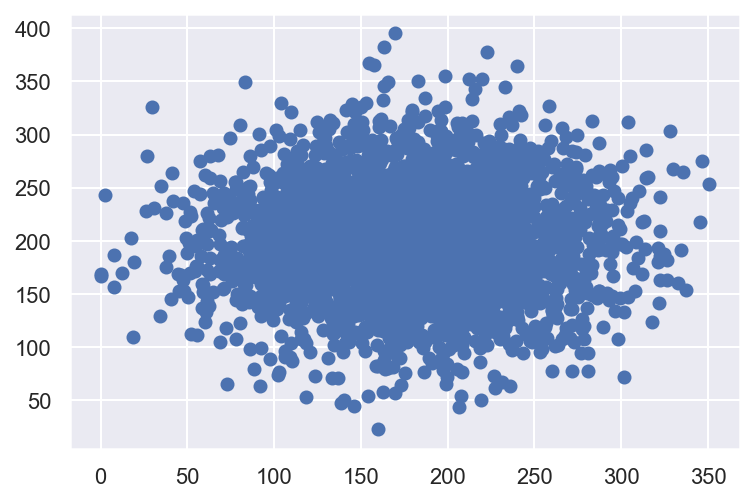

In [13]:
plt.scatter(df["Total day minutes"], df["Total night minutes"]);

Picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

Slightly fancier option to create a scatter plot with the seaborn library:

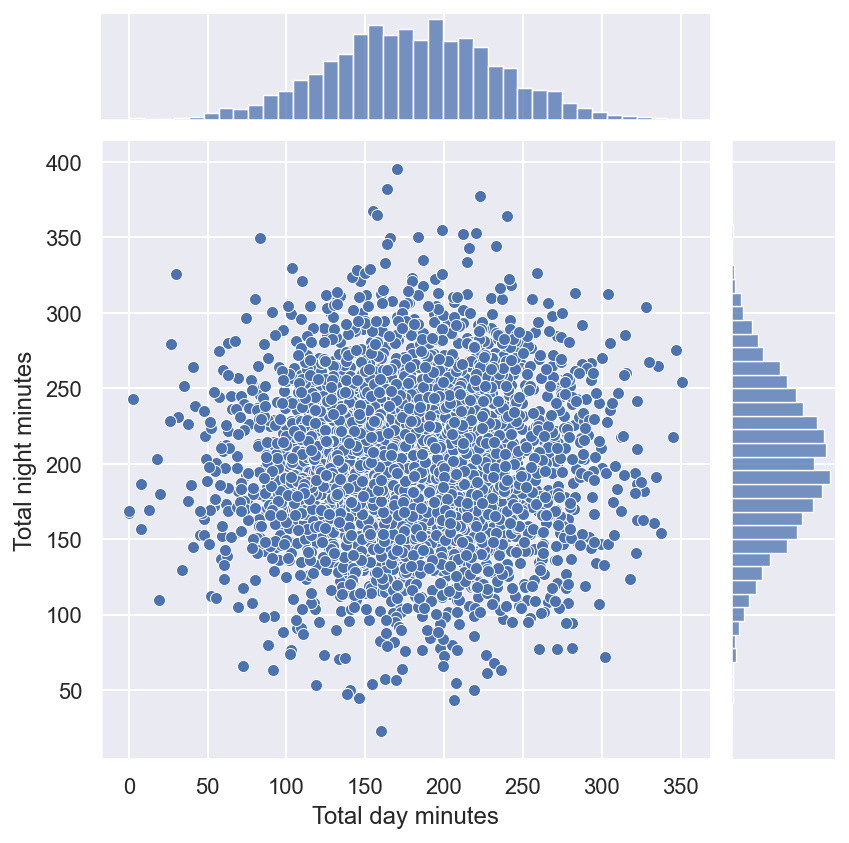

In [14]:
sns.jointplot(x="Total day minutes", \
y="Total night minutes", data=df, kind="scatter");

We can also get a smoothed version of our bivariate distribution:

/Users/rahulmehrotra/opt/anaconda3/envs/pocenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


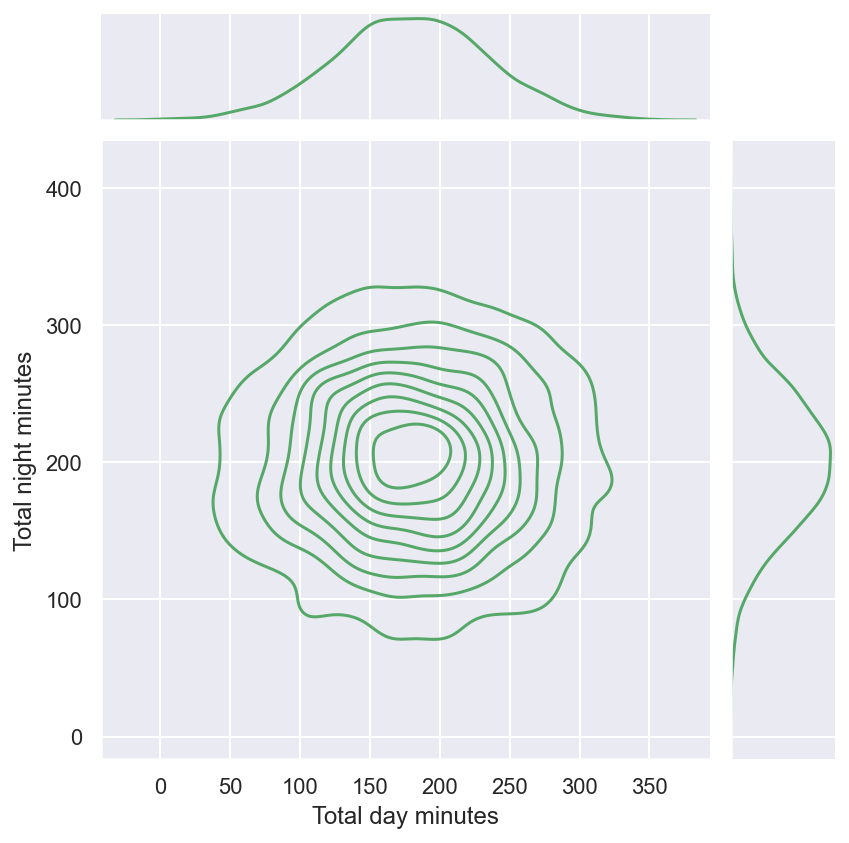

In [15]:
sns.jointplot(
    "Total day minutes", "Total night minutes", data=df, kind="kde", color="g"
);

#### Scatterplot matrix

 Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

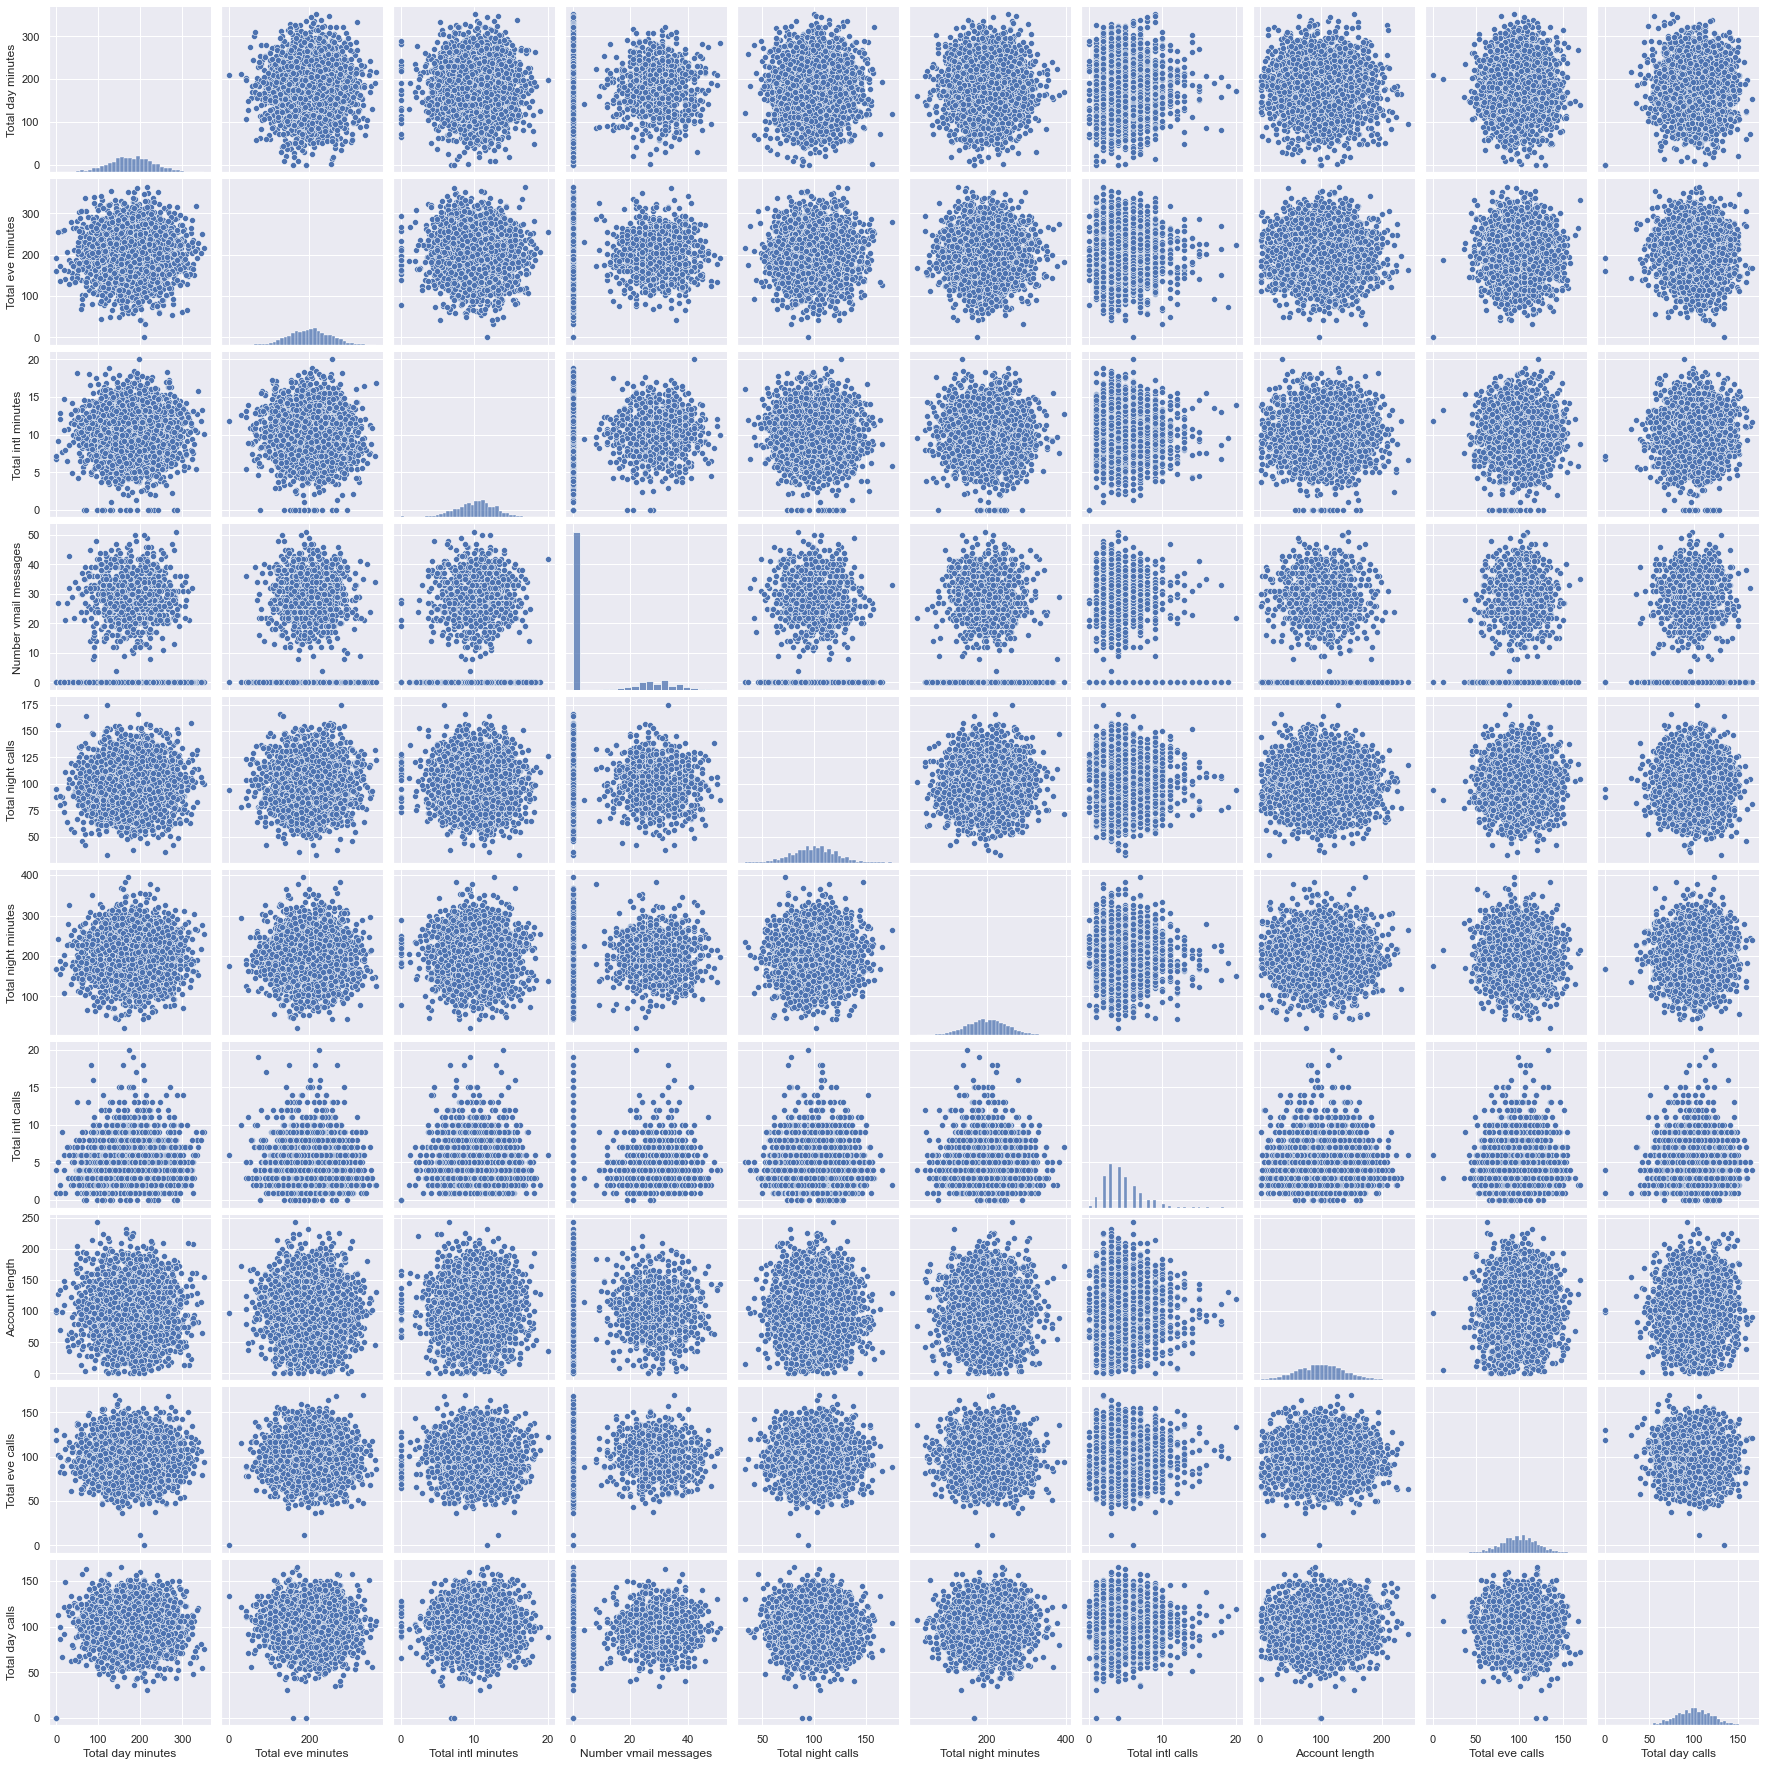

In [16]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [18]:
%config InlineBackend.figure_format = 'svg'


#### Quantitative vs. Categorical

Interactions between the numerical and categorical features.

How the input variables are related to the target variable Churn?

Scatter plot points can be color or size coded so that the values of a third categorical variable are also presented.

A function called lmplot() with the parameter hue:


/Users/rahulmehrotra/opt/anaconda3/envs/pocenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


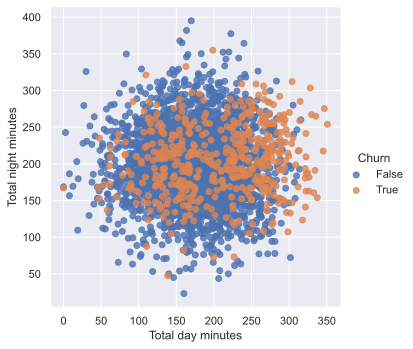

In [20]:
sns.lmplot(
    "Total day minutes", \
        "Total night minutes", \
            data=df, hue="Churn", \
                fit_reg=False
);

It seems that our small proportion of disloyal customers lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night. But this is not absolutely clear, and we won’t make any definitive conclusions from this chart.

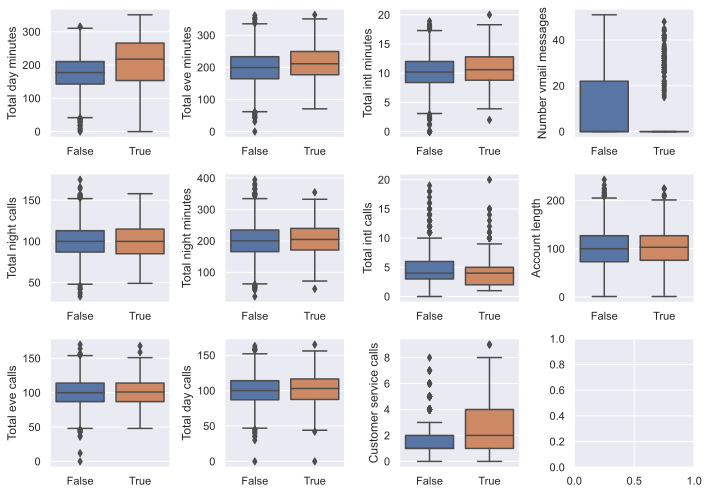

In [21]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

From this chart, we can see that the greatest discrepancy in distribution between the two groups is for three variables: 
* Total day minutes, 
* Customer service calls, and 
* Number vmail messages. 

How to determine feature importance in classification?
 
Using Random Forest or Gradient Boosting; there, we will see that the first two features are very important for churn prediction.

We can look at the distribution of day minutes spoken for the loyal and disloyal customers separately.

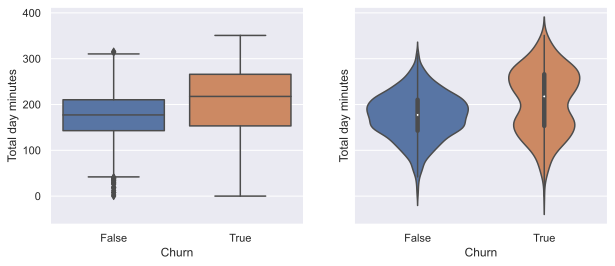

In [22]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

Disloyal customers tend to talk on the phone more:

Customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates.

We want to analyze a quantitative variable in two categorical dimensions at once — A suitable function for this in the seaborn library is catplot(). 

Visualize the interaction between Total day minutes and two categorical variables in the same plot:

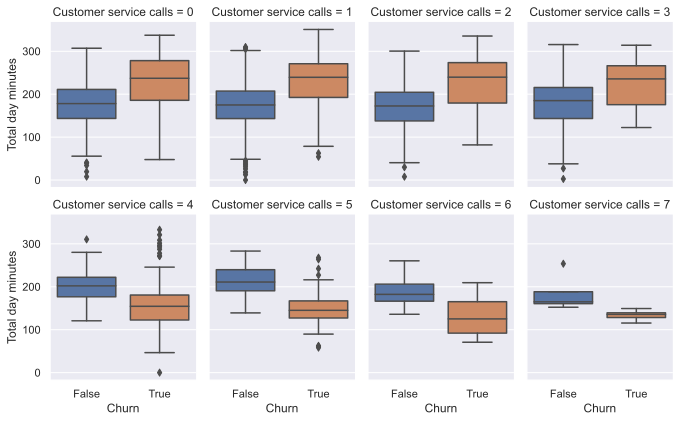

In [23]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);

From this, we could conclude that, starting with 4 calls, Total day minutes may no longer be the main factor for customer churn. Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

#### Categorical vs. Categorical

The variable Customer service calls has few unique values and, thus, can be considered either numerical or ordinal. 

Relationship between this ordinal feature and the target variable Churn:

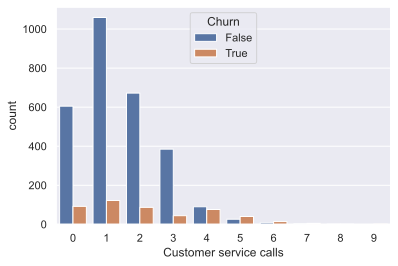

In [24]:
sns.countplot(x="Customer service calls", 
                hue="Churn", 
                data=df);

The churn rate increases significantly after 4 or more calls to customer service.

Relationship between Churn and the binary features, International plan and Voice mail plan:

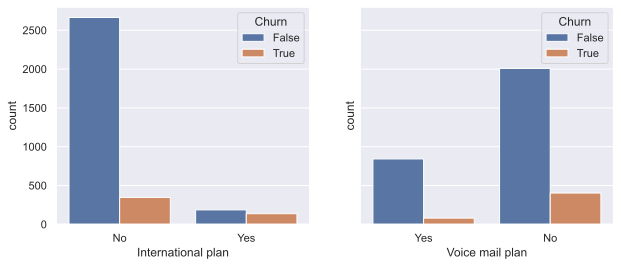

In [25]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);

When International Plan is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with Voice mail plan.